In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/AirPassengers.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Month', infer_datetime_format=True)
df.head()

,NumberPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


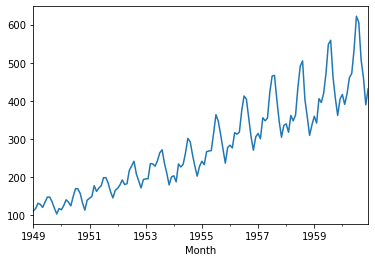

In [3]:
# Plot number of passengers
df['NumberPassengers'].plot()

# Autocorrelation and Partial Autocorrelation Analysis

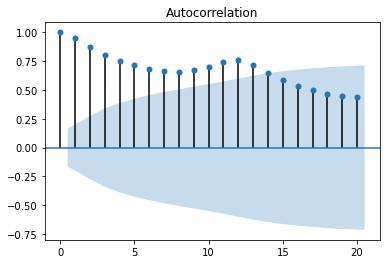

In [4]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df, lags=20);

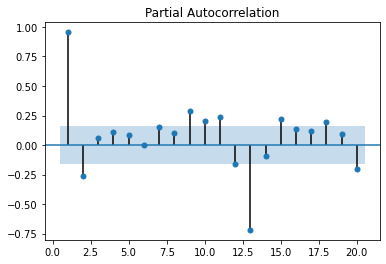

In [5]:
# Plot PACF
plot_pacf(df, zero=False, lags=20);

# ARIMA Model

In [6]:
# Run ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['NumberPassengers'], order=(2, 1, 2))

C:\Users\steve\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\steve\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [7]:
# Fit the model
results = model.fit()

In [8]:
# Display model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.NumberPassengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Tue, 11 Aug 2020   AIC                           1344.043
Time:                        21:46:38   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.NumberPassengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.NumberPassengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.NumberPassengers    -1.9098      0.065    -29.507      0.000      -2.037      -1.783
ma.L2.D.NumberPassengers     0.9996      0.068     14.806      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2965j            1.0002           -0.0479
MA.2            0.9552           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

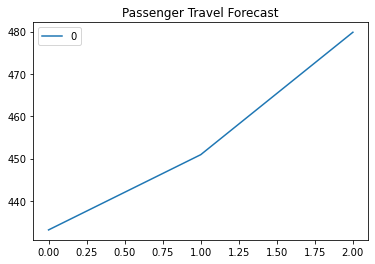

In [10]:
# Visualize the forecast
pd.DataFrame(results.forecast(steps=3)[0]).plot(title="Passenger Travel Forecast")

In [18]:
# A second model with a different order
model2 = ARIMA(df['NumberPassengers'], order=(5, 2, 4))

C:\Users\steve\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\steve\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [19]:
# Fit the model
res2 = model2.fit()

C:\Users\steve\anaconda3\envs\dev\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [20]:
# Display model summary
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D2.NumberPassengers   No. Observations:                  142
Model:                  ARIMA(5, 2, 4)   Log Likelihood                -673.422
Method:                        css-mle   S.D. of innovations             26.423
Date:                 Sat, 08 Aug 2020   AIC                           1368.843
Time:                         12:08:57   BIC                           1401.357
Sample:                     03-01-1949   HQIC                          1382.056
                          - 12-01-1960                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0068      0.060      0.113      0.910      -0.111       0.124
ar.L1.D2.NumberPassengers    -0.0467      0.090     -0.519      0.604      -0.223       0.130
ar.L2.D2.NumberPassengers    -0.2698      0.091     -2.955      0.003      -0.449      -0.091
ar.L3.D2.NumberPassengers    -0.7946      0.069    -11.578      0.000      -0.929      -0.660
ar.L4.D2.NumberPassengers    -0.0651      0.089     -0.728      0.467      -0.240       0.110
ar.L5.D2.NumberPassengers    -0.1996      0.098     -2.043      0.041      -0.391      -0.008
ma.L1.D2.NumberPassengers    -0.6775      0.044    -15.308      0.000      -0.764      -0.591
ma.L2.D2.NumberPassengers -8.221e-08      0.044  -1.89e-06      1.000      -0.085       0.085
ma.L3.D2.NumberPassengers     0.6775      0.038     17.822      0.000       0.603       0.752
ma.L4.D2.NumberPassengers    -1.0000      0.049    -20.355      0.000      -1.096      -0.904
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0975           -0.0000j            1.0975           -0.5000
AR.2            0.5348           -0.9237j            1.0673           -0.1665
AR.3            0.5348           +0.9237j            1.0673            0.1665
AR.4           -0.1491           -1.9963j            2.0019           -0.2619
AR.5           -0.1491           +1.9963j            2.0019            0.2619
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.3388           -0.9409j            1.0000           -0.1950
MA.3            0.3388           +0.9409j            1.0000            0.1950
MA.4            1.0000           -0.0000j            1.0000           -0.0000
-----------------------------------------------------------------------------
"""